![](./img/sktime-logo-text-horizontal.jpg)

### Agenda for today

1. General introduction to `sktime` & `sklearn`

2. forecasting with `sktime`

3. new feature showcase 2022-2023

Advanced modelling features:

* graphical pipelines
* parallelization, incl multivariate and hierarchical broadcasting
* probabilistic forecasting, distribution forecasts
* benchmarking and evaluation

Marketplace, deployment, model sharing features:

* estimator search, estimator tags
* serializing estimator blueprints
* serializing fitted estimators
* mlflow custom flavour


### Running the notebooks

all notebooks available on `github.com/sktime`

repository: `github.com/sktime/sktime-tutorial-pydata-global-2023`

* README instructions to run notebooks locally
* binder to run notebooks in the cloud (if wifi allows)

## 1 - Introduction to ``sktime``

### 1.1 What is ``sktime``?

- `sktime` is a python library for time series learning tasks!
  - check [our website](https://www.sktime.net/en/latest/index.html)! 
  - integrative framework layer in the time series space

- `sklearn` / `sktime` interface:
  - unified interface for objects/estimators
  - modular design, strategy pattern
  - composable, composites are interface homogeneous
  - simple specification language and parameter interface
  - visually informative pretty printing

- `sktime` is a vibrant, welcoming community with mentoring opportunities!
  - We *love* new contributors. Even if you are new to open source software development!
  - Check out the ``sktime`` [new contributors guide](https://www.sktime.net/en/latest/get_involved/contributing.html)
  - join our [discord](https://discord.com/invite/54ACzaFsn7) and/or one of our regular meetups!
  - follow us on [LinkedIn](https://www.linkedin.com/company/scikit-time/)!

### 1.2 sklearn unified interface - the strategy pattern

`sklearn` provides a unified interface to multiple learning tasks including classification, regression.

any (supervised) estimator has the following interface points

1. **Instantiate** your model of choice, with parameter settings
2. **Fit** the instance of your model
3. Use that fitted instance to **predict** new data!

![](./img/estimator-conceptual-model.jpg)

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# get data to use the model on
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [3]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
13,4.3,3.0,1.1,0.1
113,5.7,2.5,5.0,2.0
51,6.4,3.2,4.5,1.5
37,4.9,3.6,1.4,0.1
66,5.6,3.0,4.5,1.5


In [4]:
y_train.head()

13     0
113    2
51     1
37     0
66     1
Name: target, dtype: int64

In [5]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
16,5.4,3.9,1.3,0.4
97,6.2,2.9,4.3,1.3
53,5.5,2.3,4.0,1.3
108,6.7,2.5,5.8,1.8
26,5.0,3.4,1.6,0.4


In [6]:
from sklearn.svm import SVC

# 1. Instantiate SVC with parameters gamma, C
clf = SVC(gamma=0.001, C=100.0)

# 2. Fit clf to training data
clf.fit(X_train, y_train)

# 3. Predict labels on test data
y_test_pred = clf.predict(X_test)

y_test_pred

array([0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2])

IMPORTANT: to use another classifier, only the specification line, part 1 changes!

`SVC` could have been `RandomForest`, steps 2 and 3 remain the same - unified interface:

In [7]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instantiate SVC with parameters gamma, C
clf = RandomForestClassifier(n_estimators=100)

# 2. Fit clf to training data
clf.fit(X_train, y_train)

# 3. Predict labels on test data
y_test_pred = clf.predict(X_test)

y_test_pred

array([0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2])

in object oriented design terminology, this is called **"strategy pattern"**

= different estimators can be switched out without change to the interface

= like a power plug adapter, it's plug&play if it conforms with the interface

Pictorial summary:
![](./img/sklearn-unified-interface.jpg)

parameters can be accessed and set via `get_params`, `set_params`:

In [8]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 1.3 `sktime` is devoted to time-series data analysis

Richer space of time series tasks, compared to "tabular":

- **Forecasting** - predict energy consumption tomorrow, based on past weeks
- **Classification** - classify electrocardiograms to healthy/sick, based on prior examples
- **Regression** - predict compound purity in bioreactor based on temperature/pressure profile
- **Clustering** - sort outlines of tree leaves into a small number of similar classes
- **Annotation** - identify jumps, anomalies, events in a data stream

`sktime` aims to provide `sklearn`-like, modular, composable, interfaces for these!

| Task | Status | Links |
|---|---|---|
| **Forecasting** | stable | [Tutorial](https://www.sktime.net/en/latest/examples/01_forecasting.html) · [API Reference](https://www.sktime.net/en/latest/api_reference/forecasting.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/forecasting.py)  |
| **Time Series Classification** | stable | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/02_classification.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/classification.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/classification.py) |
| **Time Series Regression** | stable | [API Reference](https://www.sktime.net/en/latest/api_reference/regression.html) |
| **Transformations** | stable | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/03_transformers.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/transformations.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/transformer.py)  |
| **Parameter fitting** | maturing | [API Reference](https://www.sktime.net/en/latest/api_reference/param_est.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/transformer.py)  |
| **Time Series Clustering** | maturing | [API Reference](https://www.sktime.net/en/latest/api_reference/clustering.html) ·  [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/clustering.py) |
| **Time Series Distances/Kernels** | maturing | [Tutorial](https://github.com/sktime/sktime/blob/main/examples/03_transformers.ipynb) · [API Reference](https://www.sktime.net/en/latest/api_reference/dists_kernels.html) · [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/dist_kern_panel.py) |
| **Annotation** | experimental | [Extension Template](https://github.com/sktime/sktime/blob/main/extension_templates/annotation.py) |
| **Distributions and simulation** | experimental |  |

Example - forecasting

![](./img/tasks-forecasting.png)

In [9]:
from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
import numpy as np

# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

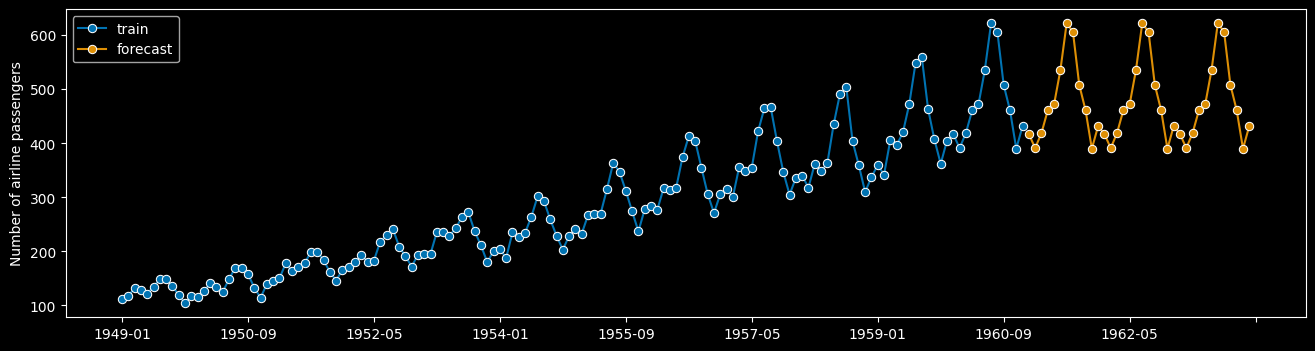

In [10]:
from sktime.utils.plotting import plot_series

fig, ax = plot_series(y, y_pred, labels=["train", "forecast"])

Example - classification

![](./img/tasks-tsc.png)

In [11]:
from sktime.datasets import load_osuleaf
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels.compose_tab_to_panel import AggrDist
from sktime.dists_kernels import ScipyDist

# step 1 - specify training data
X_train, y_train = load_osuleaf(split="train", return_type="numpy3D")

# step 2 - specify data to predict labels for
X_new, _ = load_osuleaf(split="test", return_type="numpy3D")
X_new = X_new[:2]

# step 3 - specify the classifier
mean_eucl_dist = AggrDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance=mean_eucl_dist)

# step 4 - fitting the classifier
clf.fit(X_train, y_train)

# step 5 - predict labels on new data
y_pred = clf.predict(X_new)

In [12]:
X_train.shape

(200, 1, 427)

In [13]:
y_train.shape

(200,)

In [14]:
X_new.shape

(2, 1, 427)

In [15]:
y_pred.shape

(2,)

### 1.4 `sktime` integrates the time series modelling ecosystem!

the package space for time series is highly fragmented:

* lots of great implementations and methods out there!
* but many different interfaces, not composable like `sklearn`

`sktime` integrates the ecosystem - in friendly collaboration with all the packages out there!

* unified interface standard
* highly composable
* mini-package manager on estiator/module level
* easily extensible - 3rd party plugins, other packages

![](./img/unified_framework.png)

### 1.5 Summary/What is next!

- `sklearn` interface: unified interface (strategy pattern), modular, composition stable, easy specification language
- `sktime` evolves the interface for time series learning tasks
- `sktime` integrates a fragmented ecosytem with interface, composability, dependency management

- today:
    * updated introduction forecasting
    * new feature showcase 2022-2023!

---
### Credits: notebook 1 - `sktime` intro

notebook creation: fkiraly, marrov

some vignettes based on existing `sktime` tutorials, credit: fkiraly, miraep8

slides (png/jpg):

* from fkiraly's postgraduate course at UCL, Principles and Patterns in Data Scientific Software Engineering
* ecosystem slide: fkiraly, mloning
* learning tasks: fkiraly, mloning

General credit also to `sklearn` and `sktime` contributors